S.V.Mahesh
AIE21117

A1.Use HMM for classification of your speech signal using STFT features.

In [1]:
pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 2.1 MB/s eta 0:00:00


In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

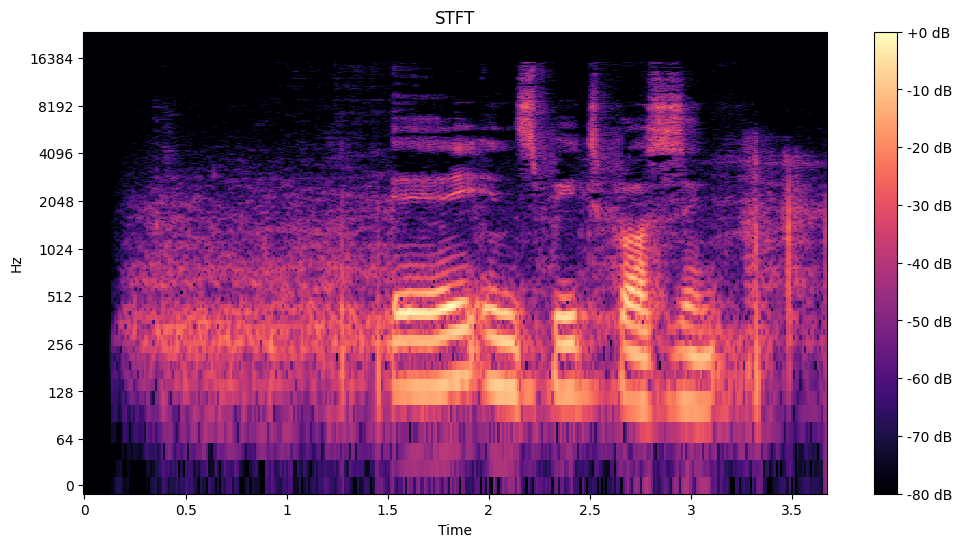

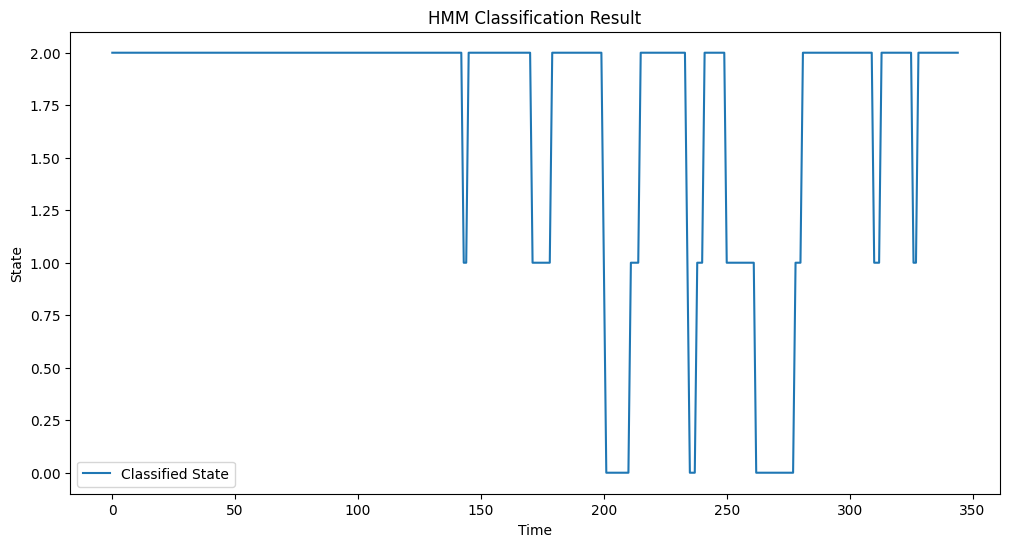

HMM Model Parameters:
Transition Matrix:
[[0.89655172 0.10344828 0.        ]
 [0.07692308 0.74358974 0.17948718]
 [0.         0.02536232 0.97463768]]
Means:
[[6.64687730e-02 5.90549060e-02 7.92891019e-02 ... 1.32978098e-04
  1.16923502e-04 8.64909031e-05]
 [9.50894926e-02 8.75947136e-02 1.44919581e-01 ... 1.58918076e-04
  1.53432954e-04 1.28458937e-04]
 [3.53813248e-02 6.38995885e-02 9.99745906e-02 ... 1.50637563e-04
  1.48655327e-04 1.29933742e-04]]
Covariances:
[[[5.46107703e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 1.96080291e-03 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.60308376e-03 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.44832169e-04
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   3.44832922e-04 0.00000000e+00]
  [0.00000000e+00 0.0

In [3]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from hmmlearn import hmm

def load_audio(file_path):
    ydata, sr = librosa.load(file_path, sr=None)
    return ydata, sr

def stft_features(ydata, sr):
    stft = np.abs(librosa.stft(ydata))
    return stft

def train_hmm(features, n_components=3, n_iter=100):
    model = hmm.GaussianHMM(n_components=n_components, covariance_type="diag", n_iter=n_iter)
    model.fit(features)
    return model

def plot_stft(stft, sr):
    plt.figure(figsize=(12, 6))
    librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title('STFT')
    plt.show()

def classify_signal(model, features):
    # Predict using the trained HMM model
    labels = model.predict(features.T)  # Transpose features to fit HMM's requirement
    return labels

def main():
    audio_file_path =r"/content/drive/MyDrive/mahesh.wav"

    # Load audio
    y, sr = load_audio(audio_file_path)

    # Extract STFT features
    stft = stft_features(y, sr)

    # Plot STFT
    plot_stft(stft, sr)

    # Train HMM
    model = train_hmm(stft.T)  # Transpose stft to fit HMM's requirement

    # Classify signal using trained HMM
    labels = classify_signal(model, stft)

    # Plot the classification result
    plt.figure(figsize=(12, 6))
    plt.plot(np.arange(len(labels)), labels, label='Classified State')
    plt.xlabel('Time')
    plt.ylabel('State')
    plt.title('HMM Classification Result')
    plt.legend()
    plt.show()

    # Print trained model parameters
    print("HMM Model Parameters:")
    print("Transition Matrix:")
    print(model.transmat_)
    print("Means:")
    print(model.means_)
    print("Covariances:")
    print(model.covars_)

if __name__ == "__main__":
    main()
